In [16]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Import our data into pandas from CSV
s_p_500 = '../CSV_files/SP500.csv'
s_p_500_df = pd.read_csv(s_p_500, low_memory=False)

In [18]:
#s_p_500_df.head()

In [19]:
# Convert Date to date format. Lots of help
#s_p_500_df['SP500'] = pd.to_numeric(s_p_500_df['SP500'])
#s_p_500_df = s_p_500_df.dropna(subset=['SP500'])

#s_p_500_df["DATE"] = pd.to_datetime(s_p_500_df["DATE"], format='%m/%d/%Y')
#s_p_500_df.head()

In [20]:
#s_p_500_df["month"] = s_p_500_df["DATE"].dt.to_period("M")
#s_p_500_df["month"] = s_p_500_df["month"].dt.strftime('%m/%Y')
#s_p_500_df.head()

In [21]:
#sp500_month_summary = s_p_500_df.groupby('month').agg(SP500=('SP500', 'mean'))
#sp500_month_summary
                                                                   

In [22]:
#len(sp500_month_summary)

In [23]:
# Import our data into pandas from CSV
#tbill_int_rate = 'TB3MS.csv'
#tbill_int_rate_df = pd.read_csv(tbill_int_rate, low_memory=False)

#tbill_int_rate_df["month"] = pd.to_datetime(tbill_int_rate_df["DATE"], format='%m/%d/%Y')
#tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.to_period("M")
#tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.strftime('%m/%Y')


#tbill_int_rate_df.head()

In [24]:
# Combine the data into a single DataFrame
#tbill_and_sp500 = pd.merge(tbill_int_rate_df, sp500_month_summary, how="left", on=["month", "month"])
#tbill_and_sp500.head()

In [25]:

#tbill_and_sp500_overlap = tbill_and_sp500.dropna(subset=['SP500', 'TB3MS'])
#tbill_and_sp500_overlap.head()

In [26]:
# ............. AND THEN A MIRACLE HAPPENS ..........
# MARKDOwn?? 
# All dataframes up to this point have been intermediate steps towards an ultimate, one-stop-shopping dataframe.
# In the interest of time, we're going to complete this desired data frame in Excel (how convenient!) then import to Python.
# This new datafram will be called omnibus_df and it will have the following features:
#
# (1) we keep the tbill and sp500 data from above. (Column headers in omnibus_df are TB3MS and SP500).
# (2) DATE field is reformated in Excel text format yyyymm, making it less ornery and more free from ERROR MESSAGES.
# (3) data for 30YEAR = home mortgage interest rates on a 30 year fixed mortgage is added.
# (4) data for INFLATION (CPI no food, no energy) is added. 
# (5) data for RECESSION, a Boolean to indicate whether there was a recession that month, is added.
# (6) data for SUNSPOTS (literally sun spot data, completely unrelated of all other data) is added.
# (7) all data runs from 197104 to 202309 (so dataframe has 630 rows for 630 months 197104 to 202309).
# (8) TB3MS (3-month treasury bill interest rate), 30YEAR and INFLATION are, per their inherent nature, expressed as %.
# (9) SP500 is also expressed as percent change for the month. SUNSPOTS is percent above/below the average.
# NOTE: as described above, omnibus_df has exactly 7 columns. GIT Collaboraters may, if they choose,add addit

In [27]:
# Import our data into pandas from CSV
omnibus = '../CSV_files/Omnibus.csv'
omnibus_df = pd.read_csv(omnibus, low_memory=False)

In [28]:
omnibus_df.head()

,DATE,SP500,TB3MS,30YEAR,INFLATION,RECESSION,SUNSPOTS
0,197104,3.55,3.86,7.31,5.34,0,24.14
1,197105,-3.54,4.14,7.43,5.09,0,-0.42
2,197106,-1.50,4.75,7.53,5.27,0,-13.62
3,197107,-4.21,5.40,7.60,5.20,0,40.14
4,197108,3.20,4.94,7.70,4.95,0,6.30


In [29]:
len(omnibus_df)

630

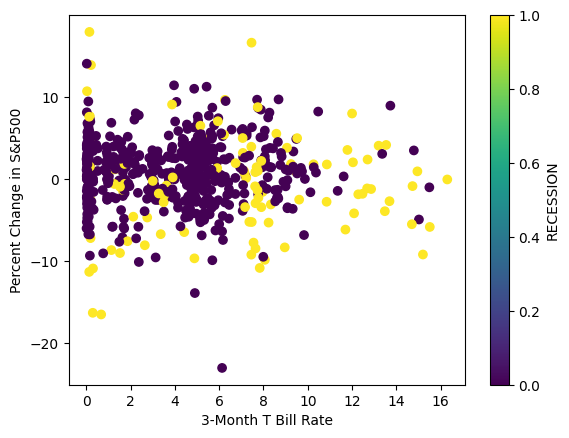

In [30]:
# Make Scatter Plot of TB3MS and SP500
plt.scatter(omnibus_df['TB3MS'],omnibus_df['SP500'],c=omnibus_df['RECESSION'])
clb = plt.colorbar()
plt.xlabel("3-Month T Bill Rate")
plt.ylabel("Percent Change in S&P500")
clb.set_label("RECESSION")
plt.savefig("../Charts/PC_SP500_chart.png")
plt.show()

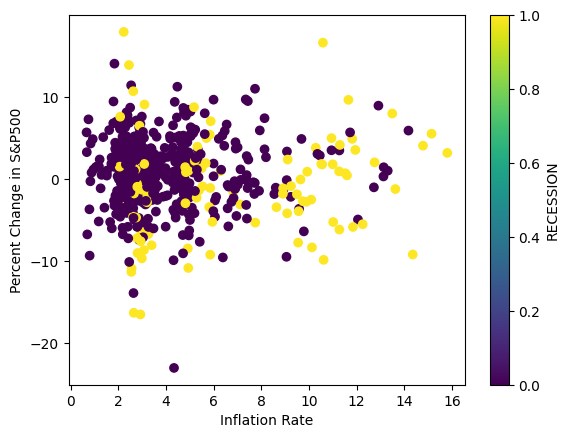

In [31]:
# Make Scatter Plot of INFLATION and SP500
plt.scatter(omnibus_df['INFLATION'],omnibus_df['SP500'],c=omnibus_df['RECESSION'])
clb = plt.colorbar()
plt.xlabel("Inflation Rate")
plt.ylabel("Percent Change in S&P500")
clb.set_label("RECESSION")
plt.savefig("../Charts/inflation_chart.png")
plt.show()

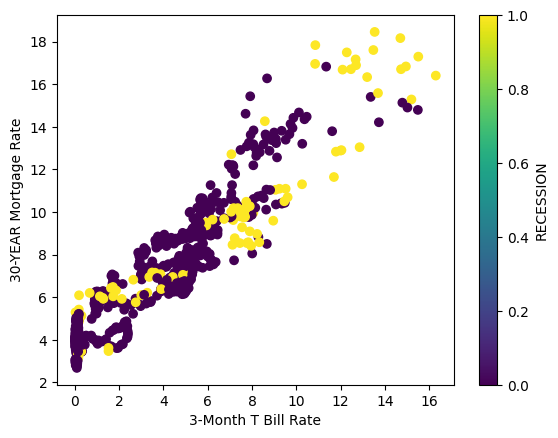

In [32]:
# Make Scatter Plot of TB3MS and 30YEAR
plt.scatter(omnibus_df['TB3MS'],omnibus_df['30YEAR'],c=omnibus_df['RECESSION'])
clb = plt.colorbar()
plt.xlabel("3-Month T Bill Rate")
plt.ylabel("30-YEAR Mortgage Rate")
clb.set_label("RECESSION")
plt.savefig("../Charts/30_year_MR_chart.png")
plt.show()

In [33]:
correlation_matrix = omnibus_df.corr()
print(correlation_matrix)

               DATE     SP500     TB3MS    30YEAR  INFLATION  RECESSION  \
DATE       1.000000  0.004233 -0.741926 -0.764088  -0.633246  -0.179220   
SP500      0.004233  1.000000 -0.020630 -0.006044  -0.006543  -0.136452   
TB3MS     -0.741926 -0.020630  1.000000  0.929872   0.750489   0.307203   
30YEAR    -0.764088 -0.006044  0.929872  1.000000   0.706781   0.268718   
INFLATION -0.633246 -0.006543  0.750489  0.706781   1.000000   0.402086   
RECESSION -0.179220 -0.136452  0.307203  0.268718   0.402086   1.000000   
SUNSPOTS  -0.269770 -0.028617  0.442556  0.435673   0.418567   0.238416   

           SUNSPOTS  
DATE      -0.269770  
SP500     -0.028617  
TB3MS      0.442556  
30YEAR     0.435673  
INFLATION  0.418567  
RECESSION  0.238416  
SUNSPOTS   1.000000  


In [34]:
# Null Hypothesis: Sunspots do not affect interest rates

In [35]:
# Does yeild curve invert when interest rates, or realIntRates, are high. Because why would long-term borrowers borrow?
# When long term int.rates are high, wouldn't long-term borrowers tend to wait a couple years?
#Counter arguement is long-term borrowers could borrow now, re-finance in a couple years